# 1. Exploring Activation Functions in Neural Networks
Objective:
To explore and compare different activation functions used in artificial neural networks
and understand their impact on the output of a neural network.
Scenario:
You are tasked with implementing and visualizing various activation functions to
observe how they transform inputs and affect the output. You will also train a simple
neural network using these activation functions and evaluate their performance.

# Lab Tasks:
1. Implement and Visualize Activation Functions:
o Implement the following activation functions in Python:
▪ Step Function
▪ Sigmoid Function (Binary and Bipolar)
▪ Tanh Function
▪ ReLU Function
o Visualize each activation function using matplotlib/seaborn/bokeh to
observe how they map input values to output values.

2. Implement a Simple Neural Network:
• Create a simple neural network with one hidden layer using each activation
function (sigmoid, tanh, and ReLU).
• Train the network on a binary classification task (e.g., XOR problem) using a
small dataset.
• Compare the performance of the neural network with different activation
functions.

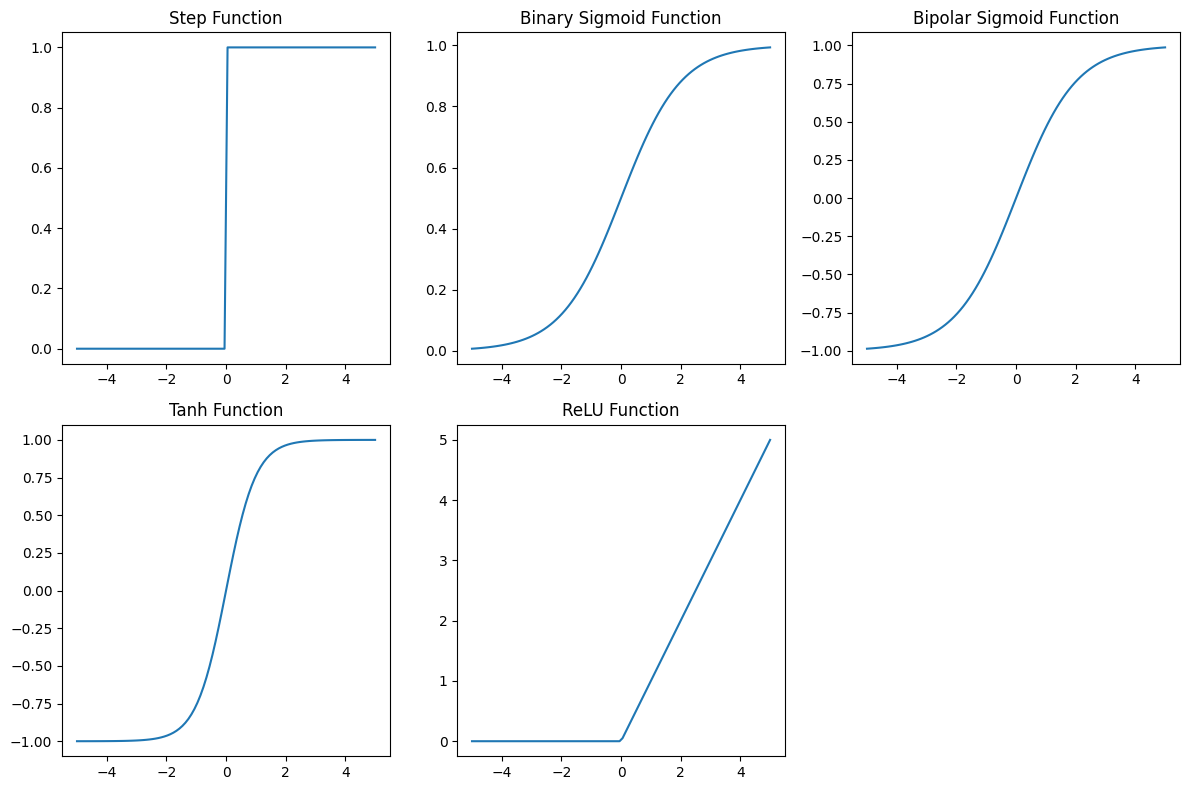

In [16]:
import numpy as np
import matplotlib.pyplot as plt

def step_function(x):
  """Step function."""
  return 1 if x >= 0 else 0

def sigmoid_binary(x):
  """Binary sigmoid function."""
  return 1 / (1 + np.exp(-x))

def sigmoid_bipolar(x):
  """Bipolar sigmoid function."""
  return 2 / (1 + np.exp(-x)) - 1

def tanh_function(x):
  """Tanh function."""
  return np.tanh(x)

def relu_function(x):
  """ReLU function."""
  return max(0, x)

# Generate input values
x = np.linspace(-5, 5, 100)

# Calculate output values for each function
y_step = [step_function(val) for val in x]
y_sigmoid_binary = [sigmoid_binary(val) for val in x]
y_sigmoid_bipolar = [sigmoid_bipolar(val) for val in x]
y_tanh = [tanh_function(val) for val in x]
y_relu = [relu_function(val) for val in x]

# Plot the activation functions
plt.figure(figsize=(12, 8))

plt.subplot(2, 3, 1)
plt.plot(x, y_step)
plt.title("Step Function")

plt.subplot(2, 3, 2)
plt.plot(x, y_sigmoid_binary)
plt.title("Binary Sigmoid Function")

plt.subplot(2, 3, 3)
plt.plot(x, y_sigmoid_bipolar)
plt.title("Bipolar Sigmoid Function")

plt.subplot(2, 3, 4)
plt.plot(x, y_tanh)
plt.title("Tanh Function")

plt.subplot(2, 3, 5)
plt.plot(x, y_relu)
plt.title("ReLU Function")

plt.tight_layout()
plt.show()



# Step Function:
#The step function is a threshold-based function. If the input is greater than or equal to 0, the output is 1; otherwise, it's 0.
# It's a simple binary classifier but lacks smoothness and isn't differentiable, which makes it less useful for training neural networks.

# Binary Sigmoid Function:
# The binary sigmoid function outputs a value between 0 and 1. It's useful for binary classification problems, where the output represents the probability of belonging to a specific class.
# It's differentiable and allows for gradient-based optimization during training.

# Bipolar Sigmoid Function:
# Similar to the binary sigmoid, the bipolar sigmoid function outputs a value between -1 and 1. This can be useful in certain scenarios, for example, when representing positive and negative values.
# Like the binary sigmoid, it's differentiable and suitable for training.

# Tanh Function:
# The tanh function (hyperbolic tangent) outputs a value between -1 and 1. It's often preferred over the sigmoid function due to its zero-centered nature, which can help with training.
# It's differentiable and commonly used in hidden layers of neural networks.

# ReLU Function:
# The ReLU (Rectified Linear Unit) function outputs the input directly if it's positive, and 0 otherwise. It's computationally efficient and has been widely used in deep learning due to its ability to overcome the vanishing gradient problem.
.


In [17]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import accuracy_score


iris = load_iris()
X = iris.data  # Features (4 features)
y = iris.target  # Target (3 classes)

# One-hot encode the target labels
encoder = OneHotEncoder()
y_onehot = encoder.fit_transform(y.reshape(-1, 1)).toarray()

# Standardize the dataset for better training
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_onehot, test_size=0.2, random_state=42)


In [18]:
# Sigmoid activation
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Derivative of Sigmoid
def sigmoid_derivative(x):
    return x * (1 - x)

# Tanh activation
def tanh(x):
    return np.tanh(x)

# Derivative of Tanh
def tanh_derivative(x):
    return 1 - np.power(x, 2)

# ReLU activation
def relu(x):
    return np.maximum(0, x)

# Derivative of ReLU
def relu_derivative(x):
    return np.where(x > 0, 1, 0)


In [19]:
class SimpleNeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size, activation_function, activation_derivative):
        self.activation_function = activation_function
        self.activation_derivative = activation_derivative

        # Initialize weights and biases
        self.weights_input_hidden = np.random.randn(input_size, hidden_size)
        self.bias_hidden = np.zeros((1, hidden_size))
        self.weights_hidden_output = np.random.randn(hidden_size, output_size)
        self.bias_output = np.zeros((1, output_size))

    def forward(self, X):
        # Forward pass: input -> hidden
        self.z_hidden = np.dot(X, self.weights_input_hidden) + self.bias_hidden
        self.a_hidden = self.activation_function(self.z_hidden)

        # Forward pass: hidden -> output
        self.z_output = np.dot(self.a_hidden, self.weights_hidden_output) + self.bias_output
        self.a_output = sigmoid(self.z_output)  # Sigmoid for output layer (binary classification)

        return self.a_output

    def backward(self, X, y, output, learning_rate=0.1):
        # Compute output error
        output_error = y - output
        output_delta = output_error * sigmoid_derivative(output)

        # Compute hidden layer error
        hidden_error = np.dot(output_delta, self.weights_hidden_output.T)
        hidden_delta = hidden_error * self.activation_derivative(self.a_hidden)

        # Update weights and biases
        self.weights_hidden_output += np.dot(self.a_hidden.T, output_delta) * learning_rate
        self.bias_output += np.sum(output_delta, axis=0, keepdims=True) * learning_rate
        self.weights_input_hidden += np.dot(X.T, hidden_delta) * learning_rate
        self.bias_hidden += np.sum(hidden_delta, axis=0, keepdims=True) * learning_rate

    def train(self, X, y, epochs=1000, learning_rate=0.1):
        for epoch in range(epochs):
            output = self.forward(X)
            self.backward(X, y, output, learning_rate)

    def predict(self, X):
        output = self.forward(X)
        return np.argmax(output, axis=1)


In [20]:
def evaluate_activation_function(activation_function, activation_derivative, name):
    # Initialize neural network with one hidden layer (4 input, 5 hidden, 3 output)
    nn = SimpleNeuralNetwork(input_size=4, hidden_size=5, output_size=3,
                             activation_function=activation_function,
                             activation_derivative=activation_derivative)


    nn.train(X_train, y_train, epochs=1000, learning_rate=0.1)

    y_pred_train = nn.predict(X_train)
    y_pred_test = nn.predict(X_test)


    y_train_labels = np.argmax(y_train, axis=1)
    y_test_labels = np.argmax(y_test, axis=1)


    train_accuracy = accuracy_score(y_train_labels, y_pred_train)
    test_accuracy = accuracy_score(y_test_labels, y_pred_test)

    print(f'Activation Function: {name} | Train Accuracy: {train_accuracy * 100:.2f}% | Test Accuracy: {test_accuracy * 100:.2f}%')

# Evaluate with Sigmoid activation
evaluate_activation_function(sigmoid, sigmoid_derivative, "Sigmoid")

# Evaluate with Tanh activation
evaluate_activation_function(tanh, tanh_derivative, "Tanh")

# Evaluate with ReLU activation
evaluate_activation_function(relu, relu_derivative, "ReLU")


Activation Function: Sigmoid | Train Accuracy: 98.33% | Test Accuracy: 100.00%
Activation Function: Tanh | Train Accuracy: 99.17% | Test Accuracy: 96.67%
Activation Function: ReLU | Train Accuracy: 98.33% | Test Accuracy: 100.00%


#Sigmoid, Tanh, and ReLU. It then evaluates the performance of these networks on the Iris dataset
# for a multi-class classification task.

# The output displays the training and testing accuracy for each activation function.  

# From the output, we can infer that:
# - The different activation functions can lead to different performance levels for the neural network.
# - The ReLU activation function appears to be the most effective in this case, yielding the highest
#   accuracy scores for both training and testing sets.
# - Sigmoid and Tanh are less effective but still provide some level of classification accuracy.